Available at http://www.comp.nus.edu.sg/~cs3244/1910/06.colab

![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/1910/img/banner-1910.png)
---
See **Credits** below for acknowledgements and rights.  For NUS class credit, you'll need to do the corresponding _Assessment_ in [CS3244 in Coursemology](http://coursemology.org/courses/1677) by the respective deadline (as in Coursemology). 

**You must acknowledge that your submitted Assessment is your independent work, see questions in the Assessment at the end.**



**Learning Outcomes for this Week**
- Understand Regularization as a means of restraining the model.
- Choose appropriate doses of regularization for a model: an appropriate regularization function and coefficient.
- Implement a Ridge Regression from scratch.
- Understand and be able to execute validation as well as common pitfalls in using validation incorrectly.
- Understand the different forms extending validation to encompass additional estimation.
- Understand how validation and regularization complement each other and their roles in affecting learning
- Learn about regularization for image denoising.

_Welcome to the Week 06 Python notebook._ This week we will learn  how regularization is used in machine learning.  We introduce **Regularization** and **Validation** in the lecture videos, and will be reviewing this material in the fifth tutorial.

In this notebook, we will go through the concepts of Regularization and Validation. We will also go through a few simple coding example involving these two concepts. We will learn different regularization techniques and amount of regularization to choose. For validation, we will go through $k$-fold cross validation and some of its examples.

---
# Week 06: Pre-tutorial Work

* Watch the CS 3244 video playlist for Week 06 Pre.  This will introduce two main concepts for this week's class: _Regularisation_ and _Validation_. These concepts are often used to combat overfitting, and hence essential to machine learning.
* After watching the videos, complete the pre-tutorial exercises and questions below.

## 1 Recall Week 05's topics


In last week's lecture, we learn about overfitting. which happens when we try to fit the data more than warranted. It happens because the hypothesis redundantly models too much **stochastic noise** and **deterministic noise** (bias). The result is that we may end up with a sizeable gap between the training cost ($J_{train}$) and the testing cost ($J_{test}$).  This is bad, because we need to have a reliable estimate of the test cost on new, unseen samples.

Roughly speaking: $J_{test}(h)$ = $J_{train}(h)$ + overfit_penalty. 

Today we will learn about two main approaches used to combat overfitting:

1. **Regularization**: Restrain the model capacity, which comes with an additional regularization error cost. This cost is supposed to approximate the overfit penalty, which approximates $J_{test}(h)$ to $J_{train}(h)$.

2. **Validation**: Reality check by peeking at a validation dataset to guess $J_{test}(h)$, mainly used to tune the hyperparameters of $J_{train}(h)$ to approximates $J_{test}(h)$



## 2 Regularization

### .a Definition

**What is it**: A cure for our tendency to fit (get distracted
by) the noise, hence improving $J_{test}$

**How does it work**: Constraining the model so that we
do not fit the noise. This will reduce the variance in the model (refer to figure below). The constraints also introduce additional value to the training errors, which helps approximating the test error as well.

**Side effects**: If we cannot fit the noise, maybe we cannot
fit the signal $f$.

<div align="center">
<img src="http://www.comp.nus.edu.sg/~cs3244/1810/6pre_reg_eg.png" width=512> 
</div>

 (Diagram Credit: Modified from the _Learning From Data_ textbook, by Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin)

### .b Example

Say we have two polynomial models:


$\mathcal{H}_{10} = \theta_0 + \theta_1  x + ... + \theta_{10}  x^{10} $

$\mathcal{H}_2 = \theta_0 +\theta_1  x + ... + \theta_{10} x^{10}$, such that $\theta_3 = \theta_4 = ... = \theta_{10} = 0$. This is known as **"hard" order constraints** that set weights to $0$.

Instead of setting the weights to zeros explicitly, we should give them a budget and let the learning algorithm choose, e.g. we can set the sum of square of weights to be smaller than a threshold. This is called **"soft" order constraints**.


$\mathcal{H}_C = \theta_0 + \theta_1 x + ... + \theta_{10}  \theta^{10}$, such that $\sum_{i=0}^{10}(\theta_i^2) \leq C$. 

If we represent $\theta$ as the weight vector of the weights: $\theta = (\theta_0, \theta_1, ... , \theta_{10})$, then the constraints become $|\theta|_2 \leq C$.

However, by having a separate constraint like this, optimization will become much more difficult. Instead, we can move to implicit  constraints where we try to minimize: $J_{train}(\theta) + 
\frac{\lambda}{m} * ||\theta||_2.$ 


($||\theta||_2$ is the Euclidean (L2) norm of the weight vector)


## 3 Validation and Model Selection


In order to decide the optimal $\lambda$ for regularization we need to have a peek into $J_{test}(w)$. However, the learning algorithm is not allowed to see the test dataset, therefore we will further subdivide among our training dataset into two subsets, one used for actual training (the training set) and the other for estimating its test error, called the validation set.

The introduction of the validation set is to help the model have a fair try at some unseen test data for us to estimate its actual test performance, and it is useful for tuning. The division of the dataset can be done randomly, however in some cases, a random division is an incorrect approach. Figure 2 explains how the validation set is used to choose the best model among $\mathcal{H}_1, \mathcal{H}_2, ... , \mathcal{H}_m$

<div align="center">
<img src="http://www.comp.nus.edu.sg/~cs3244/1810/6pre_modelSel.png" width=400> 
 </div>
 (Diagram Credit: Modified from the _Learning From Data_ textbook, by Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin)
 
 Here we will use $D_{train}$   to train $\mathcal{H}_1, \mathcal{H}_2,..., \mathcal{H}_\Theta$ to get $h_1^-, h_2^-,..., h_\Theta^-$. The performance of these models on $D_{val}$ will be used to choose the best one for testing.
 
 

### Check Your Understanding



 <div align="center">
  <img src="http://www.comp.nus.edu.sg/~cs3244/1810/6pre_learningCurve.png" width=300> 
  </div>
 (Diagram Credit: Modified from the _Learning From Data_ textbook, by Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin)
  
  In this figure, one line represents $J_{val}(h_\theta*)$ while the other represents $J_{test}(h_\theta*)$.
  Please answer Question 1–3 accordingly.

**Your Turn (Question 1):** Which curve represents $J_{val}$?

_Choose from: Blue

**Your Turn (Question 2):** Why are both curves going up?

_Choose from: Training set size decreases_

**Your Turn (Question 3):** Why do the curves get closer together?

_Choose from: Validation set size increases

###.a Programming : Validating Models

Here we will make use of libraries to show how we perform validation.

In [1]:
# We start by loading some standard libraries
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import random

ModuleNotFoundError: No module named 'sklearn'



One of the most important pieces of machine learning is model validation: that is, checking how well your model fits a given dataset. But there are some pitfalls you need to watch out for.

Consider the digits example we've been looking at in a few of our sessions. 

How might we check how well our model fits the data?

Let's use $k$ nearest neighbors classifier ($k$NN) and try to fit the digits data to that classifier.

In [ ]:
# Use seaborn for plotting defaults
import seaborn as sns; sns.set()

# Load Digits Dataset
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# train the classifier using digits data
knn.fit(X, y)

# get prediction
y_pred = knn.predict(X)

# print number of correctly classified example among all example
print("{0} out of {1} correct".format(np.sum(y == y_pred), len(y)))

1797 out of 1797 correct


Looks like we have a perfect classifier!  Yay ...?

Stop and think for a moment - what did we do wrong here?

**Yout Turn (Question 4):** What's wrong with this result?

_Choose from: $k$NN cannot be used for this problem, There is nothing wrong with having a perfect result, The learning algorithm has overfitted to our training data_

### .b Programming : Validation Set



In the previous code segment, we used same dataset for training and testing. This is **not a good idea**. If we optimize our estimator this way, we will tend to **overfit** the data, *i.e.* we learn the noise.

A better way to test a model is to use a hold-out set which doesn't enter the training. We've seen this before using `scikit-learn`'s train/test split utility. Note that by default, the train/test split method provided splits $25\%$ of the data to be the test data and $75\%$ to be the training data.

In [ ]:
from sklearn.model_selection import train_test_split # import the functionality

# split the data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)
print("Training size : {},  Test size: {}".format(len(X_train), len(X_test)))

Training size : 1347,  Test size: 450


Now we use the same $k$NN classifier, but this time we train and test on different data samples. Let's see how $k$NN classifier works in this setting.

In [ ]:
# Create a knn classifier instance
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier using X_train
knn.fit(X_train, y_train)

# Get prediction for X_test
y_pred = knn.predict(X_test)
print("{0} out of {1} correct".format(np.sum(y_test == y_pred), len(y_test)))
# Get accuracy
print("Accuracy : %.5f\n"%(knn.score(X_test, y_test)))

443 out of 450 correct
Accuracy : 0.98444



This gives us a more reliable estimate of how our model is doing. Because we are testing our model on unknown data samples, rather than using the same known data samples.

The metric we're using here, comparing the number of matches to the total number of samples, is known as the **accuracy score**, and can be computed using the following routine:

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy : {}\n".format(accuracy_score(y_test, y_pred)))

# by definition a confusion matrix C is such that C_{i, j} is equal to the number of observations 
# known to be in group i but predicted to be in group j.
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9933333333333333

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  0  0  0  0 49  0]
 [ 0  1  0  0  0  0  0  0  0 47]]


Using this, we can ask how this changes as we change the model parameters, in this case the number of neighbors:

In [ ]:
# vary the number of nearest neighbors
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print("# of neighbors = {}\t Accuracy = {}\n".format(n_neighbors, knn.score(X_test, y_test)))

# of neighbors = 1	 Accuracy = 0.9844444444444445

# of neighbors = 5	 Accuracy = 0.9844444444444445

# of neighbors = 10	 Accuracy = 0.98

# of neighbors = 20	 Accuracy = 0.9733333333333334

# of neighbors = 30	 Accuracy = 0.9644444444444444



We see that in this case, a small number of neighbors seems to be the best option.

## 4 Choosing the Correct Regularization Function



The regularization technique we have explored in *Section 2* is called "weight decay" or equivalently, $L2$ regularization. This heuristic prefers mild lines with small offset and slopes, to wild lines with bigger offset and slope.

However, there are other regularization functions as well, and as we will discuss in the post-videos, we should decide which one is suitable for a given task:

**Common Regularization Functions**:

1. **L1 Regularization** (Lasso Regularization): $||\theta||_1$

2. **L2 Regularization** (Ridge Regularization): $||\theta||_2^2$

3. **Low-order Fit**: $\sum_{q=0}^{N}(\theta_q ^ 2 q)$ (only for polynomial models). This regularizer pays more attention to higher order weights, encouraging a lower order fit.

We should have a good understanding of different regularization functions to be able to decide the best fit for your data. Lets take as an example the two most popular regularization techniques, $L1$ and $L2$.

* **Computational Efficiency:** $L2$ does have easy iterative solutions, while $L1$ does not. This makes computing $L2$-norm more computationally efficient.

* **Sparse Output**: $L1$-norm will squeeze most of the weights to $0$ while $L2$-norm does not. $L1$ regularization (LASSO) comes up with sparse solutions due to non-vanishing gradient at $0$. Therefore, $L1$-norm makes better sense as selecting a subset of features while eliminating the rest. $L2$-norm will make more sense when there is strong multicollinearity among the features.

(Don't worry if you don't quite get this yet -- we'll explore this in the post-videos on "Regularizing with $l^p$ Norms")


**BONUS**: L1 and L2 regularization are taught for pedagogical reasons. However there more sophisticated methods: a practical example is [Elastic net regularization](https://stats.stackexchange.com/questions/184029/what-is-elastic-net-regularization-and-how-does-it-solve-the-drawbacks-of-ridge/184031#184031). It's a parameterized regularization technique that is a simple balance between both L1 and L2. . The formula for Elastic net regularization is:  
$$p * ||\theta||_1 + (1-p) * ||\theta||_2^2$$
              
A slight drawback of Elastic net regularization is that we need to find (tune; possibly through validation) a new hyperparameter $p$, to decide the weight of the $L1$ regularization component versus the $L2$ component.


**Your Turn (Question 5):** Suppose the number of features is much larger than the number of data points you have (common in some fields such as Computational Biology), which regularization scheme should you choose?

_Choose from: $L1$ regularization, $L2$ regularization, Both will work, You should use different methods_

**Your Turn (Question 6):** Provide reasons for your answer for Question $5$.

_Choose from: My chosen method will help generate more data points for better training, My chosen method will help to eliminate unnecessary data points, My chosen method will lead to feature selection_

**Your Turn (Question 7):**  Please explain in your own words why $L1$ regularization leads to sparser models. (Try this before watching the post lecture videos if possible).

_Replace with your answer_

### .a Programming : Regularization Example

In [ ]:
# We start by loading some standard libraries and defining our training and validation data
from sklearn.linear_model import Lasso
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# We'll again use the digit dataset to demonstrate the effect of choosing \lambda
dataset = datasets.load_digits() 

# We split our data into training and validation, the split here is arbitray
x_train = dataset.data[:450]
y_train = dataset.target[:450]
x_val = dataset.data[450:]
y_val = dataset.target[450:]

The following code block demonstrates how you can fit a linear model using LASSO from sklearn. (The parameter we call $\lambda$ is here called $\alpha$, these variations in notation are unfortunately very common in ML.)

In [ ]:
clf = Lasso(alpha=0.1) # \alpha here is our \lambda; in sklearn that is the variable name used.
clf.fit(x_train,y_train)
print("Training score: {} Validation score: {}".format(clf.score(x_train,y_train),clf.score(x_val,y_val)))

Training score: 0.6940160570005394 Validation score: 0.39226435088470113


**Your turn:** Just using a random value for $\lambda$ doesn't make much sense, can you change the codeblock below  and actually determine the best value for $\lambda$?

In [ ]:
# List some different \alpha (\lambda) values to try as part of an array 
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
# Store all the scores in this array
scores_val = np.zeros(len(alphas))

# Train classifier for different alpha values
for i in range(0, len(alphas)):
    clf = Lasso(alpha=alphas[i])
    clf.fit(x_train, y_train)
    scores_val[i] = clf.score(x_val,y_val)
    
# Print scores for different alpha
print(scores_val)

[0.39226435 0.40696066 0.41819064 0.42665948 0.43222836 0.43376824
 0.43201736]


You might want to look at your results, feel free to use the code below.

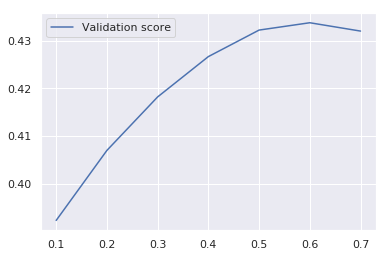

In [ ]:
plt.plot(alphas,scores_val,label="Validation score")
plt.legend()

**Your Turn (Question 8):** What value for lambda turned out to be the best (at least for this validation set)? Just type in the number (e.g., 1.00).

_Replace with your answer_

## 6 Programming : Implement a Ridge Regression Model

In this section, we will implement a _Ridge Regression Model_, which is actually a Linear Regression model with $L2$ Regularization.

Let's recall what is the loss function for linear regression with L2 Regularization:
$ Loss = (Y - X * \theta)^\top  (Y - X * \theta) + \alpha * |\theta| ^ 2$

Then, the derivation of the loss with respect to the weights ( in this case $\theta$) is:
$ -2 X^\top (Y - X * \theta) + 2 * \alpha * \theta $

As we have the derivative of loss function, we can update our weight vector based on this. Did you notice that our loss function is actually dependent on our training size? If you have a bigger training data, then you will end up with bigger loss and vice versa. This does not have much impact in long run. But to make it independent of the training size, we normalize our loss by training size before updating our weight vector.

Okay, let's calculate the gradient descent!

**Your Turn (Question 9):** Complete the code block to calculate **gradient descent**.

_Copy the code after you add or modify_

In [ ]:
def gradientDesc(weights,X,y,train_len,alpha,learning_rate,n_iter):
    """
    Args:
        weights : shape (n,1)
        X : shape (m, n)
        y : shape (m, 1)
        train_len : # of training samples
        alpha : regularization parameter
        learning_rate : learning rate of the weights
        n_iter = # of iteration
    Returns:
        weights : the updated weights vector
    """
    
    for i in range(n_iter):
        ######### Your Turn  #########
        # Write your own code here
        loss_gradient = -2 * np.dot(np.transpose(X), (y - np.dot(X,weights))) + 2*alpha*weights
        print(loss_gradient)
        loss_gradient = loss_gradient/len(y)
        ## Update the weights here
        weights -= (learning_rate * loss_gradient)
        ##############################
#         weights = weights + learning_rate * 2 * (np.dot(X.T, y) - np.dot((np.dot(X.T, X) + alpha * np.identity(X.shape[1])), weights)) / train_len
    
    return weights

print(str(gradientDesc(np.asarray([0.5]),np.asarray([[0.1],[0.2]]),np.asarray([1,-1]),2,1,0.5,1)))

[1.25]
[0.1875]


As you have completed the function above, let's try it to calculate _mean absolute percentage_ error of our model!

In [ ]:
import pandas as pd
from sklearn import linear_model
import random

alpha = 1
learning_rate = 0.5
n_iter = 1500
  
diabetes = datasets.load_diabetes()
diabetes_X_raw = diabetes.data
print("NUMBER OF FEATURES: ", diabetes_X_raw.shape[1])

# Concatenate 1 to each sample to match with the bias term
diabetes_X = np.array(list(map(lambda x: np.concatenate(([1], x)), diabetes_X_raw)))

# Use 100 samples for test set.
train_x = diabetes_X[:-100]
test_x = diabetes_X[-100:]
train_y = diabetes.target[:-100]
test_y = diabetes.target[-100:]
    
train_len = train_x.shape[0]
weights = [0.0] * (train_x.shape[1]) # Weights or parameter vector initialized with 0
weights = np.array(weights)

# To train on train data set
weights = gradientDesc(weights, train_x, train_y,train_len, alpha, learning_rate, n_iter)
    
# Even though we optimized the weights on MSE with regularization error, we use Mean Absolute Percentage Error as test metric, 
residuals = np.sum(np.array(test_x) * weights, axis=1) - test_y
residuals = [(abs(a)/b)*100 for a,b in zip(residuals,test_y)]
cost = sum(residuals)/len(residuals)

print ('Mean Absolute Percentage Error of our Model on test set:',cost,'%')

NUMBER OF FEATURES:  10
[-1.03976000e+05 -5.59534724e+02  3.32332183e+01 -1.37869049e+03
 -1.06409291e+03 -5.54648154e+02 -4.92365129e+02  9.67958086e+02
 -1.15009220e+03 -1.37496729e+03 -8.95827632e+02]
[  303.42155996  -453.27288297   -55.01541257 -1394.62698688
 -1026.22943899  -543.83075955  -454.29789727   986.16291033
 -1133.09628844 -1394.49373935  -945.07717052]
[   -1.73386416  -447.01811814   -50.78121387 -1381.52985083
 -1015.88642544  -534.87738252  -445.53523392   975.18681972
 -1118.66898269 -1380.23453487  -933.53516626]
[-8.31459516e-01 -4.40555600e+02 -4.68815451e+01 -1.36865606e+03
 -1.00557895e+03 -5.26041187e+02 -4.36812780e+02  9.64421912e+02
 -1.10441309e+03 -1.36623297e+03 -9.22307441e+02]
[-8.24814571e-01 -4.34177543e+02 -4.30439373e+01 -1.35591843e+03
 -9.95386091e+02 -5.17325719e+02 -4.28214546e+02  9.53780689e+02
 -1.09033344e+03 -1.35238755e+03 -9.11213535e+02]
[-8.15654299e-01 -4.27882048e+02 -3.92683516e+01 -1.34331564e+03
 -9.85306286e+02 -5.08729419e+02 

Then, we load the Ridge function from sklearn library. If the Mean Absolute Percentage Error of this library is comparable to your implemented function, then it is likely to be correct!  **Note:** Notation for Mean Absolute Percentage Error = $\frac{1}{m} \sum_{i=1}^m 
\frac{|y_{predict}^i - y_{true}^i|} {|y_{true}^i|}$


In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha= alpha, solver='sag', max_iter=1500) #We use the stochastic averaged gradient descent algorihtm since batch GD isn't available

clf.fit(train_x, train_y)

pred = clf.predict(test_x)
residuals = pred - test_y
residuals = [(abs(a)/b)*100 for a,b in zip(residuals,test_y)]
cost = sum(residuals)/len(residuals)
print ('Mean Absolute Percentage Error of built-in model on test set:',cost,'%')

Mean Absolute Percentage Error of built-in model on test set: 44.81196197187941 %



Actually there is a closed-form solution for the Ridge Regression, and it is easier to derive compared to gradient descent approach. So, why do we even attempt the gradient descent approach here? Hmmmmm...

Actually, closed-form solutions for other cases are often infeasible to find in general, so a generalized solution is needed.  As mentioned in lecture in Week 4, this is  why we often perform gradient descent.  Here, we ask you to try it to be familiar with its workings. :D

How about cases where gradient descent is not possible, because the loss function is not differentiable? There are other methods, such as subgradient methods but we will leave it for your own exploration.




----
# Week 06: Post-tutorial Work

Watch the Week 06 post-videos on the lecture topics introduced this week, then attempt the following exercises.  

## 7 Validation


### .a Check your Understanding

**Your Turn (Question 1):** Describe how you would divide a dataset of time series nature (e.g stock prices) for validation purposes?

_Choose from: Just use `sklearn`'s train-test split function, Randomly choose using `numpy`, Divide into consecutive blocks of time frame_

**Your Turn (Question 2):** Alex built a computer vision model that can detect people eating or texting while driving. To train the model, he has a bunch of pictures of people activities while driving, the dataset comes from $1,000$ different men. Then the dataset is randomly divided into validation and training set, which gives him a very good model. Do you think that this model will be suitable for real-life testing? (Hint: Are we doing validation correctly?)

_Choose from: Yes, No_

**Your Turn (Question 3):** Give reasons for your previous answer.

_Choose from: Dividing randomly is a good idea to generalize, He should not have divided randomly as this will lead to information leakage, There are no women in the dataset, He should have more people in his dataset_

### .b Cross Validation

Let $K$ be the size of validation set: 

*   $K \uparrow$ => $J_{val} \approx J_{test}$
*   $K \downarrow$ =>  $N - K \uparrow$ => More data for training set => Lower $J_{train}, J_{val}$ and $J_{train} \approx J_{val}$

So, can we have both big and small $K$ at the same time??? Actually the answer is "sort of". We can create a validation set of size $K$ where $K$ is big, however we can reuse that validation set for training. The procedure is called **K-fold Cross Validation** as described below:


1.   Split the dataset $\mathcal{D}$ into $K$ separate sets of equal size.
  *   Suppose $\mathcal{D} = (\mathcal{D}_1, \mathcal{D}_2, ... ,\mathcal{D}_K)$
  *   Commonly chosen $K$ are $K$ = 5 and $K$ = 10
2.   For each $k$ = 1,2,...,$K$, we fit the model to training set **excluding** the $k$th-fold $T_k$
 > 2.1 Compute the fitted values for the observations in $\mathcal{D}_k$, based on the training data that excluded this fold.
               
 > 2.2 Compute the cross-validation (CV) error for the $k$-th fold:  $(CV Error)_k^\lambda$
3.  The model then has overall cross-validation error: $(CV Error)^\lambda= \frac{\sum_{k=1}^{K} (CV Error)_k}{K}$
4.   We will then proceed to choose $\lambda$ such that $(CV Error)^\lambda$ is minimized.

Let's get back to the example code in the pre-tutorial section. In the above, we've only used $3/4$ of the data for the training, and used $1/4$ for the validation. Another option is to use **2-fold cross-validation**, where we split the sample in half and perform the validation for each half separately. When we train the classifier using the first half ($X1$), we test it using the other half ($X2$), and vice versa.

In [ ]:
# Load the Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test data
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state= 11)
print("Size of X1 = {}; Size of X2 = {}".format(len(X1),len(X2)))

Size of X1 = 898; Size of X2 = 899


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X1, y1)
print("Accuracy (training on first half) : {}".format(knn.score(X2, y2)))
knn.fit(X2, y2)
print("Accuracy (training on second half) : {}".format(knn.score(X1, y1)))

Accuracy (training on first half) : 0.978865406006674
Accuracy (training on second half) : 0.9821826280623608


Thus, two-fold cross-validation gives us two estimates of the score for that parameter.



### .c K-fold Cross-Validation

Here we've used 2-fold cross-validation. This is just one specialization of $K$-fold cross-validation, where we split the data into $K$ chunks and perform $K$ fits, where each chunk gets a turn being the validation set. 

There is an easy to do $K$-fold cross validation using ```scikit-learn```. We can do this by changing the ``cv`` parameter shown below. Let's do 10-fold cross-validation:

In [ ]:
from sklearn.model_selection import cross_val_score

# setting cv parameter to 10, for 10-fold cross validation
cv = cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
print("Accuracy of different fold\n {}\n".format(cv))
print("The mean accuracy of all folds: {}".format(cv.mean()))

Accuracy of different fold
 [0.93513514 0.99453552 0.97237569 0.98888889 0.96089385 0.98882682
 0.99441341 0.98876404 0.97175141 0.96590909]

The mean accuracy of all folds: 0.9761493860252022


This gives us an even better idea of how well our model is doing!

**Remarks:**

1. Our data set might be small, so we might not have enough observations to put aside a test set. In this case:
    > 1.1.    Let all of the available data be our training set. 
    
    > 1.2.    Still apply $K$-fold cross validation. Then we still choose $\alpha^*$ as the minimizer of CV error
    
    > 1.3.   Then refit the model with $\alpha^*$ on the entire training set

2. In terms of computational efficiency, $K$-fold cross validation is quite inefficient because the algorithm has be to performed repeatedly for $K$ times. In the extreme case where $ K \equiv m$, we have a special name which is **Leave One Out Cross Validation**. Actually, there is a much more efficient algorithm for Leave One Out Cross Validation rather than performing the algorithm repeatedly for $m$ times, but we will leave them for your own exploration.


### .d The wrong and right way to validation



Consider a classification problem with a large number of predictors, as may
arise, for example, in genomic or proteomic applications. A typical strategy
for analysis might be as follows:

1. Screen the predictors: find a subset of “good” predictors that show
fairly strong (univariate) correlation with the class labels
2. Using just this subset of predictors, build a multivariate classifier.
3. Use cross-validation to estimate the unknown tuning parameters and
to estimate the prediction error of the final model.

Is this a correct application of cross-validation? Consider a scenario with
$m$ = 50 samples in two equal-sized classes, and $p$ = 5000 quantitative
predictors (standard Gaussian) that are independent of the class labels.
The true (test) cost of any classifier is 50%. We carried out the above
recipe, choosing in step (1) the 100 predictors having highest correlation
with the class labels, and then using a 1-nearest neighbor classifier, based
on just these 100 predictors, in step (2). Over 50 simulations from this
setting, the average CV cost was 3%. This is far lower than the true
cost of 50%.


**Your Turn (Question 4):** What do you think happened there in the above example? If possible, please suggest a modification of the procedure.

_Replace with your answer_

## 8 Check Your Understanding




**1.** Here you will need to try to derive the closed-form formula for ridge regression, using the derivative of the loss function we gave in the pre-tutorial notebook. 

**Hint**: What is the condition of the derivative of the loss function for local minima/maxima?  

**Your Turn (Question 5):** What is the closed-form solution for *Ridge Regression*?

_Choose one from the following options:_
> **A** : $(X +\lambda I)^{-1}X^\top Y$

> **B** : $(X^\top Y +\lambda I)^{-1}X^\top X$

> **C** : $(X^\top Y)^{-1}(X^\top X +\lambda I)$

> **D** : $(X^\top X +\lambda I)^{-1}X^\top Y$

**2.** In the previous section, we are told that the reason why we use gradient descent for ridge regression is because we cannot always find a closed-form solution for a regularized problem. However that is not the only reason. Actually, calculating the closed-form solution for ridge regression is also more computationally expensive compared to the gradient descent approach (Look at the formula you derive above, the inverse of the big matrix is the key issue). 

But in the pre-tutorial notebook code example, when we use batch gradient descent it is actually slower than the closed-form approach. 

**Your Turn (Question 6):** Can you suggest how to improve it?

_Replace with your answer_

You have learned about correct way to do validation for time-series data. How about cross- validation?

**Your Turn (Question 7):** Suppose you are given a time-series of  $[1, 2, 3, 4  ]$, and you need to do leave-one-out cross validation. Among these two options, which one is correct:

> **A: (Train[$1$], Test[$2$]), (Train[$1,2$], Test[$3$]), (Train[$1,2,3$], Test[$4$])**

> **B: (Train[$2,3,4$], Test[$1$]), (Train[$1,3,4$], Test[$2$]), (Train[$1,2,4$], Test[$3$]), (Train[$2,3,4$], Test[$1$])**

## 9 Total Variation Regularization for Image Denoising

In this section we will learn an application of regularization in image denoising. Simple approach, but good results!

We consider 2D signals (i.e images), where $y_{i, j}$ is defined as the pixel value at location (i, j). The total variation norm of the image is defined as:

$Variation(y) = \sum_{i, j} |y_{i+1, j} - y_{i, j}| + |y_{i, j+1} - y_{i, j}|$

Our goal is to transform the image to a new image where the new image is as close to the original image as possible but the total variation should also be minimized.

To measure the closeness of the two images, we can make use of this metric:

$J(x, y) = \frac{1}{2} \sum_{i, j} |x_{i. j} - y_{i, j}|$

If we think of the total variation as something we need to give regularization, then our goal is to find a new image $x$ where:

$ J(x, y) + \lambda Variation(x)$

Looks familiar? 


### .a Code Example
Let's play with total variation image denoising to see how effective it is. Note that this approach is much better than simple denoise method such as median filter because it is proved to retain the edge information better.

_Note: This code does take awhile to run- please be patient!_

Reference: This code is taken from http://scikit-image.org/docs/0.6/auto_examples/plot_lena_tv_denoise.html

     |████████████████████████████████| 18.6MB 9.3MB/s 
  Created wheel for scikit-image: filename=scikit_image-0.11.3-cp36-cp36m-linux_x86_64.whl size=24188150 sha256=b8f6cb6afe29d2716150fbb11de06fe2a5fbda6ee85f4367e8b45c3b3f195510
  Stored in directory: /root/.cache/pip/wheels/f5/7e/44/3207e930f91ac5a35b82fa22de1e84f0cc2f0be4a2c2800c89
Successfully built scikit-image
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


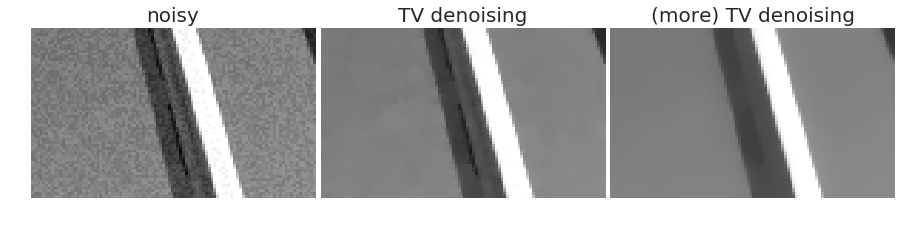

In [ ]:
!pip install 'scikit-image<0.12.0'
import numpy as np
import scipy
import matplotlib.pyplot as plt
try:
    from skimage.restoration import denoise_tv_chambolle
except ImportError:
    # skimage < 0.12
    from skimage.filters import denoise_tv_chambolle

l = scipy.misc.ascent()
l = l[230:290, 220:320]

# Play around with this k value
k = 0.6
noisy = l + k*l.std()*np.random.random(l.shape)

# Play around with this weight value. The higher the weight, the larger the regularization
# cost => The stronger the denoising is (but with the expense of losing fidelity)

tv_denoised = denoise_tv_chambolle(noisy, weight=10)


plt.figure(figsize=(12, 2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('TV denoising', fontsize=20)

tv_denoised = denoise_tv_chambolle(noisy, weight=50)
plt.subplot(133)
plt.imshow(tv_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('(more) TV denoising', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

**Your Turn (Question 8):** For $k = 0.6$, play around with the weights (think of weight as similar to lambda in regularization). Give the approximation of the best weight (or $\lambda$).

_Replace with your answer_

---
# Credits
Authored by Mohammad Neamul Kabir, Poh Jie, Le Trung Hieu, Martin Strobel and [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).
Please retain and add to this credits cell if using this material as a whole or in part.   Credits for photos given in their captions.